In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

local_list = os.listdir("/content/drive/MyDrive/방언_분류기")
print(local_list)

['2020-02-016.한국어방언(제주도)_sample.zip', '2020-02-013.한국어방언(강원도)_sample.zip', '2020-02-015.한국어방언(전라도)_sample.zip', '2020-02-012.상담음성_sample.zip', '2020-02-014.한국어방언(경상도)_sample.zip', '방언.zip', 'dataset.zip', 'DialectDataset.csv', 'dialect_dataset.zip']


In [4]:
os.mkdir("방언")

!unzip -qq "/content/drive/MyDrive/방언_분류기/2020-02-016.한국어방언(제주도)_sample.zip" -d "방언/Jeju"
!unzip -qq "/content/drive/MyDrive/방언_분류기/2020-02-013.한국어방언(강원도)_sample.zip" -d "방언/Gangwon"
!unzip -qq "/content/drive/MyDrive/방언_분류기/2020-02-015.한국어방언(전라도)_sample.zip" -d "방언/Jeolla"
!unzip -qq "/content/drive/MyDrive/방언_분류기/2020-02-014.한국어방언(경상도)_sample.zip" -d "방언/Gyeongsang"
# !unzip -qq "/content/drive/MyDrive/방언_분류기/2020-02-012.상담음성_sample.zip" -d "Seoul"

In [ ]:
!unzip -qq "/content/Seoul/원천데이터/KtelSpeech.zip" -d "방언/Seoul"

In [5]:
!pip install wave

  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1240 sha256=271e41f273fbcc178d29ed1cdfb06e07711dc5cfd48c9bdf61ee972040ea8311
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [10]:
import json 

with open("/content/방언/Jeju/라벨링데이터/DZES21001309.json", encoding='utf-8-sig') as f:
  json_object = json.load(f)

#print(json_object)

print(json_object["utterance"][0]["eojeolList"][0]["isDialect"])

False


In [ ]:
import wave
import os
import numpy as np 
import json
import array

local_list = ['Jeju', 'Gangwon', 'Jeolla', 'Gyeongsang']

def split_wav(local):
  file_list = os.listdir("/content/" + "방언/" + local + "/원천데이터")
  print(file_list)

  cnt = 0
  for index, x in enumerate(file_list): 
    w = wave.open(os.path.join(os.getcwd(), "noises", "sample", "/content/방언/" + local + "/원천데이터/"+ x), "r")
    wavLen = w.getnframes() / w.getframerate()
    buffer = w.readframes(w.getnframes())
    amplitude = (np.frombuffer(buffer, dtype="int16"))

    with open('/content/방언/' + local + '/라벨링데이터/' + os.path.splitext(x)[0] + ".json", encoding='utf-8-sig') as f:
      json_object = json.load(f)

    # if os.path.isdir("방언/" + local + "/cut"):
    #   pass
    # else:
    #   os.mkdir("방언/" + local + "/cut")

    for i in range(len(json_object["utterance"])):
      s_amp = amplitude[int(json_object["utterance"][i]['start'] * w.getframerate() * w.getnchannels()):int(json_object["utterance"][i]['end'] * w.getframerate() * w.getnchannels())]
      save_wave = wave.Wave_write(os.path.join("방언/" + local + "/" + local + "_" + str(cnt) + ".wav"))
      cnt += 1
      save_wave.setparams(w.getparams())
      save_wave.writeframes(array.array('h', s_amp).tobytes())
      save_wave.close()

for local in local_list:
  split_wav(local)

['DZES21001309.wav', 'DZJD20000016.wav', 'DZHF20002065.wav', 'DZHF20002307.wav', 'DZES21001311.wav', 'DZJD20000081.wav', 'DZHF20002064.wav']
['DGIN21500282.wav', 'DGIN21500286.wav', 'DGIN21500284.wav', 'DGIN21500283.wav', 'DGIN21500285.wav']
['DJDD20000001.wav', 'DJDD20000270.wav', 'DJDD20000271.wav', 'DJDD20000003.wav', 'DJDD20000002.wav', 'DJDD20000272.wav']
['DKSR20005647.wav', 'DKSR20005657.wav', 'DKSR20005649.wav', 'DKSR20005643.wav', 'DKSR20005640.wav', 'DKSR20005646.wav', 'DKSR20005670.wav', 'DKSR20005656.wav', 'DKSR20005652.wav', 'DKSR20005644.wav', 'DKSR20005662.wav', 'DKSR20005663.wav', 'DKSR20005650.wav', 'DKSR20005669.wav', 'DKSR20005677.wav', 'DKSR20005665.wav', 'DKSR20005642.wav', 'DKSR20005659.wav', 'DKSR20005645.wav', 'DKSR20005672.wav', 'DKSR20005648.wav', 'DKSR20005664.wav', 'DKSR20005651.wav', 'DKSR20005639.wav', 'DKSR20005676.wav', 'DKSR20005678.wav', 'DKSR20005679.wav', 'DKSR20005654.wav', 'DKSR20005673.wav']


In [ ]:
import shutil

# shutil.rmtree('/content/방언/Jeju')
# shutil.rmtree('/content/방언/Gangwon')
# shutil.rmtree('/content/방언/Jeolla')
# shutil.rmtree('/content/방언/Gyeongsang')

shutil.rmtree('/content/방언/Jeju/라벨링데이터')
shutil.rmtree('/content/방언/Jeju/원천데이터')
shutil.rmtree('/content/방언/Gangwon/라벨링데이터')
shutil.rmtree('/content/방언/Gangwon/원천데이터')
shutil.rmtree('/content/방언/Jeolla/라벨링데이터')
shutil.rmtree('/content/방언/Jeolla/원천데이터')
shutil.rmtree('/content/방언/Gyeongsang/라벨링데이터')
shutil.rmtree('/content/방언/Gyeongsang/원천데이터')

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders 
splitfolders.ratio('/content/dataset/방언', output="/content/dataset/dataset", seed=77, ratio=(0.8, 0.1, 0.1))

Copying files: 13470 files [01:09, 194.37 files/s]


In [ ]:
!zip -r /content/drive/MyDrive/방언_분류기/dataset.zip /content/dataset/dataset/ 

Streaming output truncated to the last 5000 lines.
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_2447.wav (deflated 33%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_5065.wav (deflated 35%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_5884.wav (deflated 27%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_5716.wav (deflated 27%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_2944.wav (deflated 29%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_4430.wav (deflated 30%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_3455.wav (deflated 30%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_5072.wav (deflated 27%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_182.wav (deflated 27%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_281.wav (deflated 22%)
  adding: content/dataset/dataset/train/Gyeongsang/Gyeongsang_2280.wav (deflated 27%)
  add

In [ ]:
import os
import csv

f = open('DialectDataset.csv','a', newline='')
wr = csv.writer(f)

jeju_list = os.listdir("/content/dataset/방언/Jeju")
gangwon_list = os.listdir("/content/dataset/방언/Gangwon")
jeolla_list = os.listdir("/content/dataset/방언/Jeolla")
gyeongsang_list = os.listdir("/content/dataset/방언/Gyeongsang")

local_list = ['Jeju', 'Gangwon', 'Jeolla', 'Gyeongsang']

wr.writerow(['filename', 'label', 'local'])
for local in local_list: 
    if local == "Jeju":
      for wav in jeju_list: 
        wr.writerow([wav, 0, local])
    if local == "Gangwon":
      for wav in gangwon_list: 
        wr.writerow([wav, 1, local])
    if local == "Jeolla":
      for wav in jeolla_list: 
        wr.writerow([wav, 2, local])    
    if local == "Gyeongsang":
      for wav in gyeongsang_list: 
        wr.writerow([wav, 3, local])

f.close()

In [ ]:
import shutil
import os
 
file_source = '/content/dataset/방언/Jeolla/'
file_destination = '/dataset/'
 
get_files = os.listdir(file_source)
 
for g in get_files:
    shutil.move(file_source + g, file_destination)


In [ ]:
!zip -r /dataset.zip /dataset/

Streaming output truncated to the last 5000 lines.
  adding: dataset/Gyeongsang_5287.wav (deflated 29%)
  adding: dataset/Gyeongsang_5171.wav (deflated 30%)
  adding: dataset/Gangwon_263.wav (deflated 17%)
  adding: dataset/Gangwon_329.wav (deflated 21%)
  adding: dataset/Gyeongsang_3834.wav (deflated 36%)
  adding: dataset/Gangwon_1013.wav (deflated 20%)
  adding: dataset/Jeju_1949.wav (deflated 14%)
  adding: dataset/Gyeongsang_2908.wav (deflated 19%)
  adding: dataset/Gangwon_222.wav (deflated 23%)
  adding: dataset/Gyeongsang_4197.wav (deflated 30%)
  adding: dataset/Gyeongsang_4995.wav (deflated 29%)
  adding: dataset/Gyeongsang_1067.wav (deflated 33%)
  adding: dataset/Jeolla_667.wav (deflated 16%)
  adding: dataset/Gyeongsang_39.wav (deflated 36%)
  adding: dataset/Gyeongsang_4403.wav (deflated 23%)
  adding: dataset/Jeju_3648.wav (deflated 21%)
  adding: dataset/Jeolla_1372.wav (deflated 19%)
  adding: dataset/Gyeongsang_3959.wav (deflated 30%)
  adding: dataset/Gyeongsang_2679

In [ ]:
!unzip -qq "/content/drive/MyDrive/방언_분류기/dialect_dataset.zip" -d "/"

replace /dataset/Jeju_2335.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/방언_분류기/DialectDataset.csv')

In [ ]:
df.head()

,filename,label,local
0,Jeju_2335.wav,0,Jeju
1,Jeju_2642.wav,0,Jeju
2,Jeju_185.wav,0,Jeju
3,Jeju_3575.wav,0,Jeju
4,Jeju_647.wav,0,Jeju


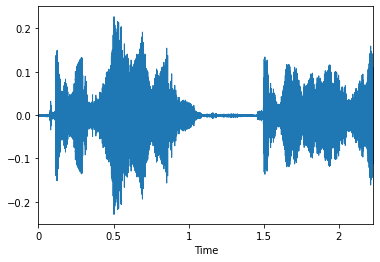

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display


sample_num=3 #pick a file to display
filename=df.filename[sample_num]
label = df.label[sample_num] 
y,sr=librosa.load('/dataset/' + str(filename)) #load the file
librosa.display.waveplot(y,sr=sr, x_axis='time')

In [ ]:
df['label'].value_counts()


3    6243
0    4037
2    2026
1    1164
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df.label

#Split once to get the test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
print(X_train.shape,X_test.shape)

#Split twice to get the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val))

                  filename       local
0            Jeju_2335.wav        Jeju
1            Jeju_2642.wav        Jeju
2             Jeju_185.wav        Jeju
3            Jeju_3575.wav        Jeju
4             Jeju_647.wav        Jeju
...                    ...         ...
13465  Gyeongsang_3318.wav  Gyeongsang
13466   Gyeongsang_875.wav  Gyeongsang
13467  Gyeongsang_1101.wav  Gyeongsang
13468  Gyeongsang_1285.wav  Gyeongsang
13469  Gyeongsang_5307.wav  Gyeongsang

[13470 rows x 2 columns]
(10102, 2) (3368, 2)
(7576, 2) (3368, 2) (2526, 2) 7576 3368 2526


In [ ]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

In [ ]:
!pip3 install tqdm

In [ ]:
def get_duration(audio_path):
    audio = wave.open(audio_path)
    frames = audio.getnframes()
    rate = audio.getframerate()
    duration = frames / float(rate)
    return duration

 
for index_num,row in tqdm_notebook(df.iterrows()):
  file_name = os.path.join(os.path.abspath('/dataset/' +row["filename"]))
  duration = get_duration(file_name) 
  if (duration < 1):
    !rm -rf filename 
    df.drop('filename')


In [ ]:
from tqdm import tqdm_notebook

extracted_features=[]
for index_num,row in tqdm_notebook(df.iterrows()):
  file_name = os.path.join(os.path.abspath('/dataset/' +row["filename"]))
  final_class_labels = row["label"]
  try:
    data=features_extractor(file_name)
  except ValueError as e: 
    pass 
  extracted_features.append([data,final_class_labels])


0it [00:00, ?it/s]

In [ ]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head(10)

,feature,label
0,"[-383.97092, 130.39249, 5.032152, 22.701984, -...",0
1,"[-456.7276, 132.72334, 7.050352, 38.405334, -1...",0
2,"[-415.12183, 117.94299, -29.630339, 32.93098, ...",0
3,"[-390.5456, 132.30093, -29.653437, 40.011215, ...",0
4,"[-476.4565, 132.06525, -4.719746, 27.575079, -...",0
5,"[-258.28217, 73.72156, 2.4820929, 26.23318, -3...",0
6,"[-455.36398, 149.85382, 37.584515, 21.452986, ...",0
7,"[-423.2053, 68.08602, 4.9750047, 11.843881, -1...",0
8,"[-389.0647, 108.05374, 7.5596, 35.65568, -2.72...",0
9,"[-330.71405, 120.62582, -37.104298, 32.95835, ...",0


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/200
325/337 [===========================>..] - ETA: 0s - loss: 8.3598 - accuracy: 0.3647
Epoch 1: val_loss improved from inf to 1.31579, saving model to saved_models/audio_classification.hdf5
337/337 [==============================] - 3s 5ms/step - loss: 8.1246 - accuracy: 0.3657 - val_loss: 1.3158 - val_accuracy: 0.4733
Epoch 2/200
335/337 [============================>.] - ETA: 0s - loss: 1.3579 - accuracy: 0.4378
Epoch 2: val_loss improved from 1.31579 to 1.25555, saving model to saved_models/audio_classification.hdf5
337/337 [==============================] - 1s 4ms/step - loss: 1.3565 - accuracy: 0.4381 - val_loss: 1.2555 - val_accuracy: 0.4733
Epoch 3/200
337/337 [==============================] - ETA: 0s - loss: 1.2034 - accuracy: 0.4736
Epoch 3: val_loss improved from 1.25555 to 1.09553, saving model to saved_models/audio_classification.hdf5
337/337 [==============================] - 1s 4ms/step - loss: 1.2034 - accuracy: 0.4736 - val_loss: 1.0955 - val_accuracy: 0.4933

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9955456852912903


In [ ]:
filename="/content/전라도.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-113.19721     118.106636    -14.259168     28.82559     -17.714539
   13.220447     -8.264376     12.410228     -4.0141964    11.847697
   -4.7339625     7.695193     -7.851281      3.873544     -5.256155
    2.829479     -6.214938      0.5343907    -7.915502     -2.5728078
   -4.7868204     1.6959949   -11.031501      0.6277146    -5.863071
   -5.4976416    -2.5680964    -3.4523761    -5.367661      2.4143069
    0.648738      1.8644309     1.5500689    -1.9455172    -1.9341431
   -2.4301085    -2.6861143    -1.261128     -0.41977695   -0.88252115]
[[-113.19721     118.106636    -14.259168     28.82559     -17.714539
    13.220447     -8.264376     12.410228     -4.0141964    11.847697
    -4.7339625     7.695193     -7.851281      3.873544     -5.256155
     2.829479     -6.214938      0.5343907    -7.915502     -2.5728078
    -4.7868204     1.6959949   -11.031501      0.6277146    -5.863071
    -5.4976416    -2.5680964    -3.4523761    -5.367661      2.4143069
     0.648738      1

array([1])